# Gyroscope Discontinuity of Reference

## Import

In [1]:
import gym
from gym import spaces
from gym.utils import seeding
import numpy as np
from os import path
from scipy.integrate import solve_ivp

import gym_gyroscope_env
from custom_functions.custom_functions import create_env
from custom_functions.custom_functions import load_agent
import torch

import matplotlib.pyplot as plt
%matplotlib inline

## Environment and Agent

In [2]:
# Initialization args
env_name = 'GyroscopeEnv-v0'
simu_args = {
    'dt': 0.02,
    'ep_len': 100,
    'seed': 2
}
reward_func = 'Normalized'
reward_args = {
    'k': 0.05, 
    'qx2': 0.01, 
    'qx4': 0.01, 
    'pu1': 0.5, 
    'pu2': 0.5
}

# Create env
env = create_env(env_name,simu_args,reward_func,reward_args)

# Initial state
x_0 = [0,0,0,0,0,0,0]
observation = env.reset(x_0)

In [3]:
import os.path
p = os.path.abspath('..')
path = p + '/test_reward/ddpg_q_e/pyt_save/model.pt'
ac = torch.load(path)

## Run the test now

In [4]:
x_0 = [0,0,0,0,np.pi,0,0]
# x_0 = [0.1, 0, 0, 0, np.pi, 0, 0]
observation = env.reset(x_0)

time = np.arange(0, 10, env.dt)
state_record_p = np.empty([len(time), len(x_0)])
reward_record_p = np.empty([len(time), 1])
action_record_p = np.empty([len(time), 2])

for i in range(len(time)):
    
    action = ac.act(torch.as_tensor(observation, dtype=torch.float32))
    
    observation, reward, done, info = env.step(action)
    state_record_p[i] = env.state
    reward_record_p[i] = reward
    action_record_p[i] = action
    
x_0 = [0,0,0,0,-np.pi,0,0]
# x_0 = [0.1, 0, 0, 0, -np.pi, 0, 0]
observation = env.reset(x_0)

time = np.arange(0, 10, 0.02)
state_record_n = np.empty([len(time), len(x_0)])
reward_record_n = np.empty([len(time), 1])
action_record_n = np.empty([len(time), 2])

for i in range(len(time)):
    
    action = ac.act(torch.as_tensor(observation, dtype=torch.float32))
    
    observation, reward, done, info = env.step(action)
    state_record_n[i] = env.state
    reward_record_n[i] = reward
    action_record_n[i] = action

## Plot

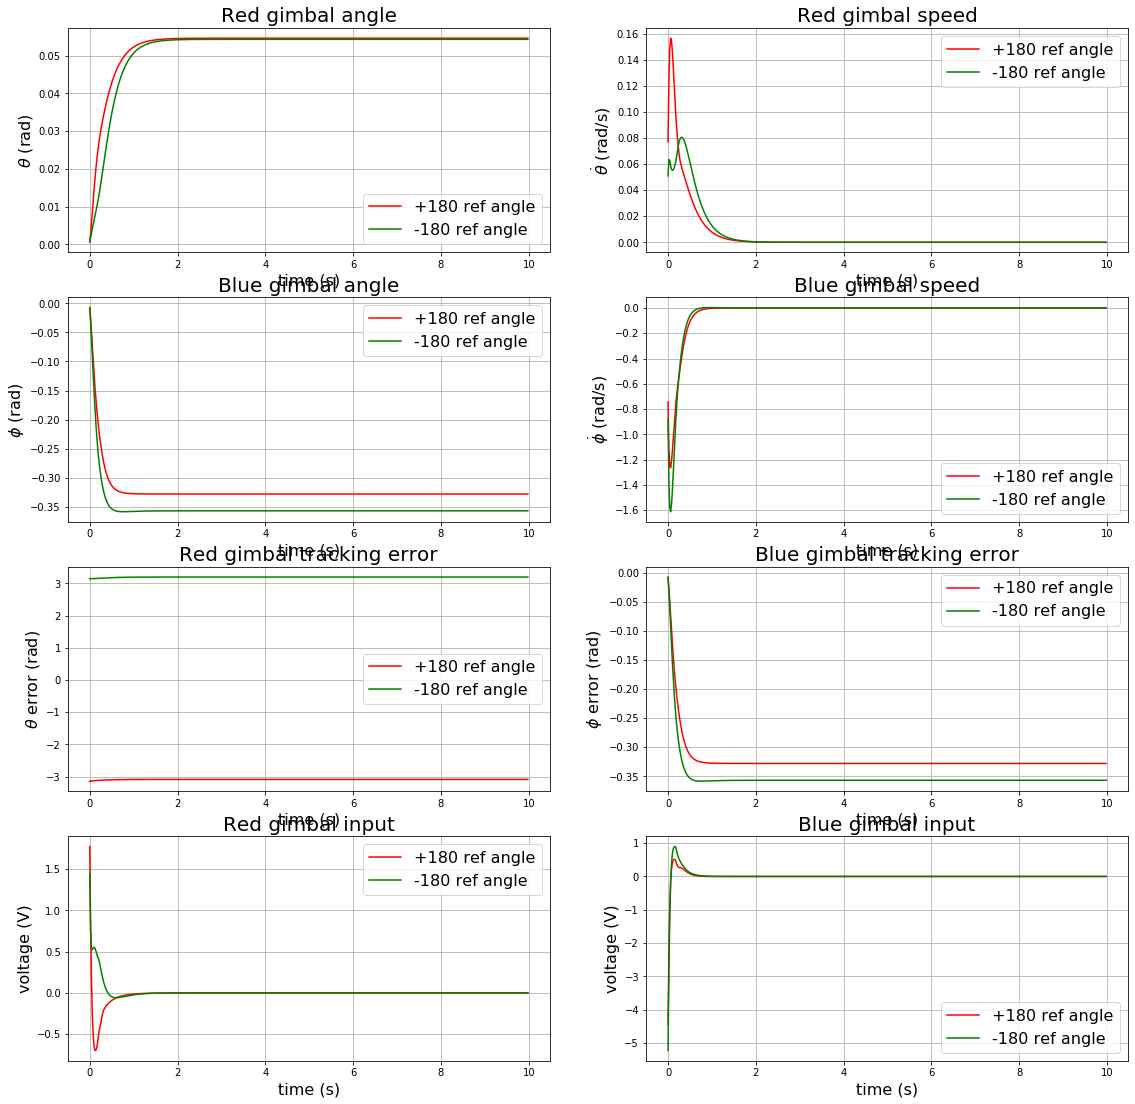

In [5]:
f, axs = plt.subplots(4,2,figsize=(19,19))

plt.subplot(4,2,1)
plt.title('Red gimbal angle',fontsize=20)
plt.xlabel('time (s)',fontsize=16)
plt.ylabel(r'$\theta$ (rad)',fontsize=16)
plt.grid()
plt.plot(time,state_record_p[:,0],'r-')
plt.plot(time,state_record_n[:,0],'g-')
plt.legend(['+180 ref angle', '-180 ref angle'], fontsize=16)

plt.subplot(4,2,2)
plt.title('Red gimbal speed',fontsize=20)
plt.xlabel('time (s)',fontsize=16)
plt.ylabel(r'$\dot \theta$ (rad/s)',fontsize=16)
plt.grid()
plt.plot(time,state_record_p[:,1],'r-')
plt.plot(time,state_record_n[:,1],'g-')
plt.legend(['+180 ref angle', '-180 ref angle'], fontsize=16)

plt.subplot(4,2,3)
plt.title('Blue gimbal angle',fontsize=20)
plt.xlabel('time (s)',fontsize=16)
plt.ylabel(r'$\phi$ (rad)',fontsize=16)
plt.grid()
plt.plot(time,state_record_p[:,2],'r-')
plt.plot(time,state_record_n[:,2],'g-')
plt.legend(['+180 ref angle', '-180 ref angle'], fontsize=16)

plt.subplot(4,2,4)
plt.title('Blue gimbal speed',fontsize=20)
plt.xlabel('time (s)',fontsize=16)
plt.ylabel(r'$\dot \phi$ (rad/s)',fontsize=16)
plt.grid()
plt.plot(time,state_record_p[:,3],'r-')
plt.plot(time,state_record_n[:,3],'g-')
plt.legend(['+180 ref angle', '-180 ref angle'], fontsize=16)

plt.subplot(4,2,5)
plt.title('Red gimbal tracking error',fontsize=20)
plt.xlabel('time (s)',fontsize=16)
plt.ylabel(r'$\theta$ error (rad)',fontsize=16)
plt.grid()
plt.plot(time,state_record_p[:,0]-state_record_p[:,4],'r-')
plt.plot(time,state_record_n[:,0]-state_record_n[:,4],'g-')
plt.legend(['+180 ref angle', '-180 ref angle'], fontsize=16)

plt.subplot(4,2,6)
plt.title('Blue gimbal tracking error',fontsize=20)
plt.xlabel('time (s)',fontsize=16)
plt.ylabel(r'$\phi$ error (rad)',fontsize=16)
plt.grid()
plt.plot(time,state_record_p[:,2]-state_record_p[:,5],'r-')
plt.plot(time,state_record_n[:,2]-state_record_n[:,5],'g-')
plt.legend(['+180 ref angle', '-180 ref angle'], fontsize=16)

plt.subplot(4,2,7)
plt.title('Red gimbal input',fontsize=20)
plt.xlabel('time (s)',fontsize=16)
plt.ylabel('voltage (V)',fontsize=16)
plt.grid()
plt.plot(time,action_record_p[:,0]*10,'r-')
plt.plot(time,action_record_n[:,0]*10,'g-')
plt.legend(['+180 ref angle', '-180 ref angle'], fontsize=16)

plt.subplot(4,2,8)
plt.title('Blue gimbal input',fontsize=20)
plt.xlabel('time (s)',fontsize=16)
plt.ylabel('voltage (V)',fontsize=16)
plt.grid()
plt.plot(time,action_record_p[:,1]*10,'r-')
plt.plot(time,action_record_n[:,1]*10,'g-')
plt.legend(['+180 ref angle', '-180 ref angle'], fontsize=16)

plt.savefig('discontinuity.png')

plt.show()

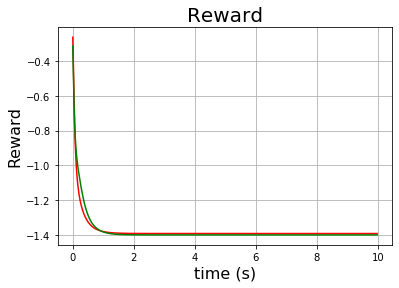

In [6]:
plt.title('Reward',fontsize=20)
plt.xlabel('time (s)',fontsize=16)
plt.ylabel('Reward',fontsize=16)
plt.grid()
plt.plot(time,reward_record_p,'r-')
plt.plot(time,reward_record_n,'g-')